In [10]:
import pandas as pd
import numpy as np

In [12]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [13]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [14]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df = pd.DataFrame(np.random.randn(6,4 ), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.152587,-0.332668,-1.696394,0.915500
2013-01-02,-0.096700,-0.822771,-0.852678,-0.852336
2013-01-03,2.595715,-0.437158,0.131852,0.726232
2013-01-04,-0.683135,-0.819968,-0.289858,1.484547
2013-01-05,-0.357978,-0.442556,0.334570,-0.227776
2013-01-06,-0.045751,-1.690246,-0.756285,-1.406087


In [17]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20200101'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2020-01-01,1.0,3,test,foo
1,1.0,2020-01-01,1.0,3,train,foo
2,1.0,2020-01-01,1.0,3,test,foo
3,1.0,2020-01-01,1.0,3,train,foo


In [18]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. 

In [24]:
rng = pd.date_range('1/1/2020', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2020-01-01    0.290871
2020-01-02   -1.133950
2020-01-03    0.247746
2020-01-04    0.364850
2020-01-05   -0.397639
Freq: D, dtype: float64

In [27]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 00:00:00+00:00    0.290871
2020-01-02 00:00:00+00:00   -1.133950
2020-01-03 00:00:00+00:00    0.247746
2020-01-04 00:00:00+00:00    0.364850
2020-01-05 00:00:00+00:00   -0.397639
Freq: D, dtype: float64

In [29]:
ts_utc.tz_convert('US/Eastern')

2019-12-31 19:00:00-05:00    0.290871
2020-01-01 19:00:00-05:00   -1.133950
2020-01-02 19:00:00-05:00    0.247746
2020-01-03 19:00:00-05:00    0.364850
2020-01-04 19:00:00-05:00   -0.397639
Freq: D, dtype: float64

In [34]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31    0.546026
2012-02-29    0.789750
2012-03-31   -0.071505
2012-04-30    1.521342
2012-05-31   -0.928385
Freq: M, dtype: float64

In [35]:
ps = ts.to_period()

ps

2012-01    0.546026
2012-02    0.789750
2012-03   -0.071505
2012-04    1.521342
2012-05   -0.928385
Freq: M, dtype: float64

In [36]:
ps.to_timestamp()

2012-01-01    0.546026
2012-02-01    0.789750
2012-03-01   -0.071505
2012-04-01    1.521342
2012-05-01   -0.928385
Freq: MS, dtype: float64

In [37]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's')

ts.head()

1990-03-01 00:00    2.115774
1990-06-01 00:00    0.317535
1990-09-01 00:00   -1.126546
1990-12-01 00:00   -0.968004
1991-03-01 00:00   -0.177767
Freq: H, dtype: float64

In [38]:
df = pd.DataFrame({"id": [1,2,3,4,5,6],
                  "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [40]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [42]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [43]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [44]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [46]:
import matplotlib.pyplot as plt

plt.close('all')

<AxesSubplot:>

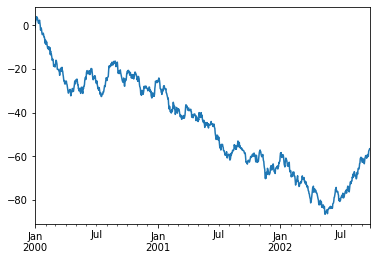

In [48]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()

<Figure size 432x288 with 0 Axes>

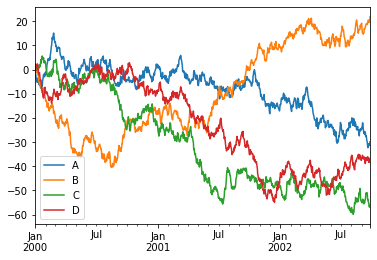

In [52]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                 columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc='best')

In [53]:
df.to_csv('foo.csv')

In [54]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.975401,2.351498,0.027772,0.351707
1,2000-01-02,-1.652629,2.311189,0.203623,-0.547960
2,2000-01-03,-2.414711,2.060551,2.163463,0.979133
3,2000-01-04,-4.055400,1.936468,1.977038,1.504094
4,2000-01-05,-4.084083,-0.299222,1.176951,0.956370
...,...,...,...,...,...
995,2002-09-22,-30.663872,19.951951,-55.086050,-36.523284
996,2002-09-23,-30.961189,19.599522,-56.119363,-38.418386
997,2002-09-24,-31.455265,20.264423,-56.849604,-36.945004
998,2002-09-25,-31.395326,19.527901,-56.174894,-36.885973


In [62]:
df.to_hdf('foo.h5', 'df')

ImportError: Missing optional dependency 'tables'.  Use pip or conda to install tables.

In [66]:
import openpyxl

df.to_excel('foo.xlsx', 'Sheet1')

In [67]:
if pd.Series([False, True, False]):
...     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().